In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [88]:
train=pd.read_csv("Doctor_Fee_Train.csv")
test=pd.read_csv("Doctor_Fee_Test.csv")

In [89]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [90]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [91]:
print(train.shape,test.shape)

(5961, 7) (1987, 6)


In [92]:
print(train.columns,test.columns)

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object') Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')


In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
Qualification         5961 non-null object
Experience            5961 non-null object
Rating                2659 non-null object
Place                 5936 non-null object
Profile               5961 non-null object
Miscellaneous_Info    3341 non-null object
Fees                  5961 non-null int64
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [94]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
Qualification         1987 non-null object
Experience            1987 non-null object
Rating                897 non-null object
Place                 1981 non-null object
Profile               1987 non-null object
Miscellaneous_Info    1153 non-null object
dtypes: object(6)
memory usage: 93.3+ KB


In [95]:
#Check Duplicates
train.duplicated().sum()

40

In [96]:
#Removing Duplicates
train=train.drop_duplicates()

In [97]:
#Check Duplicates
test.duplicated().sum()

11

In [98]:
#Removing Duplicates
test=test.drop_duplicates()

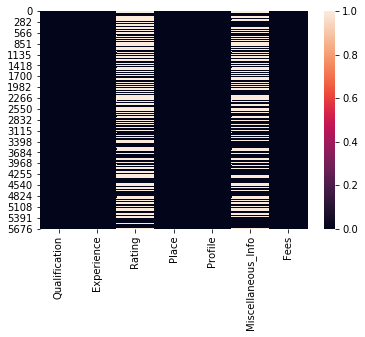

In [99]:
#To check missing value
sns.heatmap(train.isnull())

In [100]:
train.isnull().sum()

Qualification            0
Experience               0
Rating                3262
Place                    2
Profile                  0
Miscellaneous_Info    2581
Fees                     0
dtype: int64

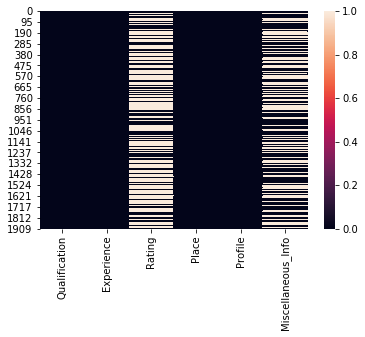

In [101]:
#To check missing value
sns.heatmap(test.isnull())

In [102]:
test.isnull().sum()

Qualification            0
Experience               0
Rating                1079
Place                    1
Profile                  0
Miscellaneous_Info     823
dtype: int64

In [103]:
#Qualification
train['Qual_1'] = train['Qualification'].str.split(',').str[0]
train['Qual_2'] = train['Qualification'].str.split(',').str[1]
train['Qual_3'] = train['Qualification'].str.split(',').str[2]

In [104]:
#Qualification
test['Qual_1'] = test['Qualification'].str.split(',').str[0]
test['Qual_2'] = test['Qualification'].str.split(',').str[1]
test['Qual_3'] = test['Qualification'].str.split(',').str[2]

In [105]:
train['Qual_1'].fillna("XXX",inplace = True)
train['Qual_2'].fillna("YYY",inplace = True)
train['Qual_3'].fillna("ZZZ",inplace = True)

In [106]:
test['Qual_1'].fillna("XXX",inplace = True)
test['Qual_2'].fillna("YYY",inplace = True)
test['Qual_3'].fillna("ZZZ",inplace = True)

In [107]:
# Extract years of experience
train["Experience"] = train["Experience"].str.split()
train["Experience"] = train["Experience"].str[0].astype("int")

In [108]:
test["Experience"] = test["Experience"].str.split()
test["Experience"] = test["Experience"].str[0].astype("int")

In [109]:
# Extract cities and state
train["Place"].fillna("Unknown,Unknown",inplace=True)
train["Place"] = train["Place"].str.split(",")
train["City"] = train["Place"].str[-1]
train["Place"] = train["Place"].str[0]

In [110]:
# Extract cities and state
test["Place"].fillna("Unknown,Unknown",inplace=True)
test["Place"] = test["Place"].str.split(",")
test["City"] = test["Place"].str[-1]
test["Place"] = test["Place"].str[0]

In [111]:
#Rating
train["Rating"].fillna("-99%",inplace=True)
train["Rating"] = train["Rating"].str.rstrip('%').astype('float') / 100.0

In [112]:
bins = [-99,0,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1.00]
labels = [i for i in range(11)]
train["Rating"] = pd.cut(train["Rating"],bins=bins,labels=labels,include_lowest=True)

In [113]:
#Rating
test["Rating"].fillna("-99%",inplace=True)
test["Rating"] = test["Rating"].str.rstrip('%').astype('float') / 100.0

bins = [-99,0,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1.00]
labels = [i for i in range(11)]
test["Rating"] = pd.cut(test["Rating"],bins=bins,labels=labels,include_lowest=True)

In [114]:
train=train.drop(columns=["Qualification","Miscellaneous_Info"])
test=test.drop(columns=["Qualification","Miscellaneous_Info"])

Label Encoding

In [117]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [118]:
train['Place']= le.fit_transform(train['Place']) 
train['City']= le.fit_transform(train['City'])
train['Rating']= le.fit_transform(train['Rating'])
train['Profile']= le.fit_transform(train['Profile']) 
train['Qual_1']= le.fit_transform(train['Qual_1']) 
train['Qual_2']= le.fit_transform(train['Qual_2']) 
train['Qual_3']= le.fit_transform(train['Qual_3']) 

In [119]:
test['Place']= le.fit_transform(test['Place']) 
test['City']= le.fit_transform(test['City'])
test['Rating']= le.fit_transform(test['Rating'])
test['Profile']= le.fit_transform(test['Profile']) 
test['Qual_1']= le.fit_transform(test['Qual_1']) 
test['Qual_2']= le.fit_transform(test['Qual_2']) 
test['Qual_3']= le.fit_transform(test['Qual_3']) 

In [120]:
train.head()

,Experience,Rating,Place,Profile,Fees,Qual_1,Qual_2,Qual_3,City
0,24,8,296,5,100,8,252,406,4
1,12,8,856,0,350,5,241,406,0
2,9,0,452,3,300,79,334,406,0
3,12,0,68,0,250,12,7,406,0
4,20,8,335,0,250,5,426,406,1


In [121]:
test.head()

,Experience,Rating,Place,Profile,Qual_1,Qual_2,Qual_3,City
0,35,0,142,4,48,243,195,6
1,31,0,578,3,48,79,195,5
2,40,2,212,2,48,28,195,1
3,0,0,373,0,1,243,195,3
4,16,5,231,1,2,157,195,0


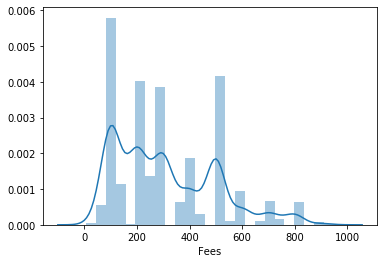

In [243]:
sns.distplot(train["Fees"])

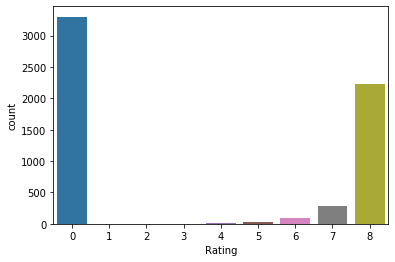

In [242]:
sns.countplot(x="Rating",data=train)

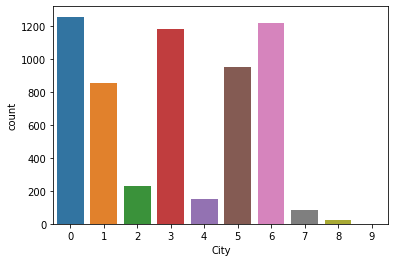

In [247]:
sns.countplot(x="City",data=train)

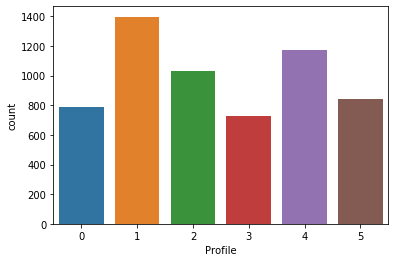

In [248]:
sns.countplot(x="Profile",data=train)

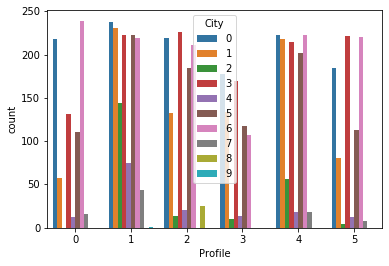

In [250]:
sns.countplot(hue="City",x="Profile",data=train)

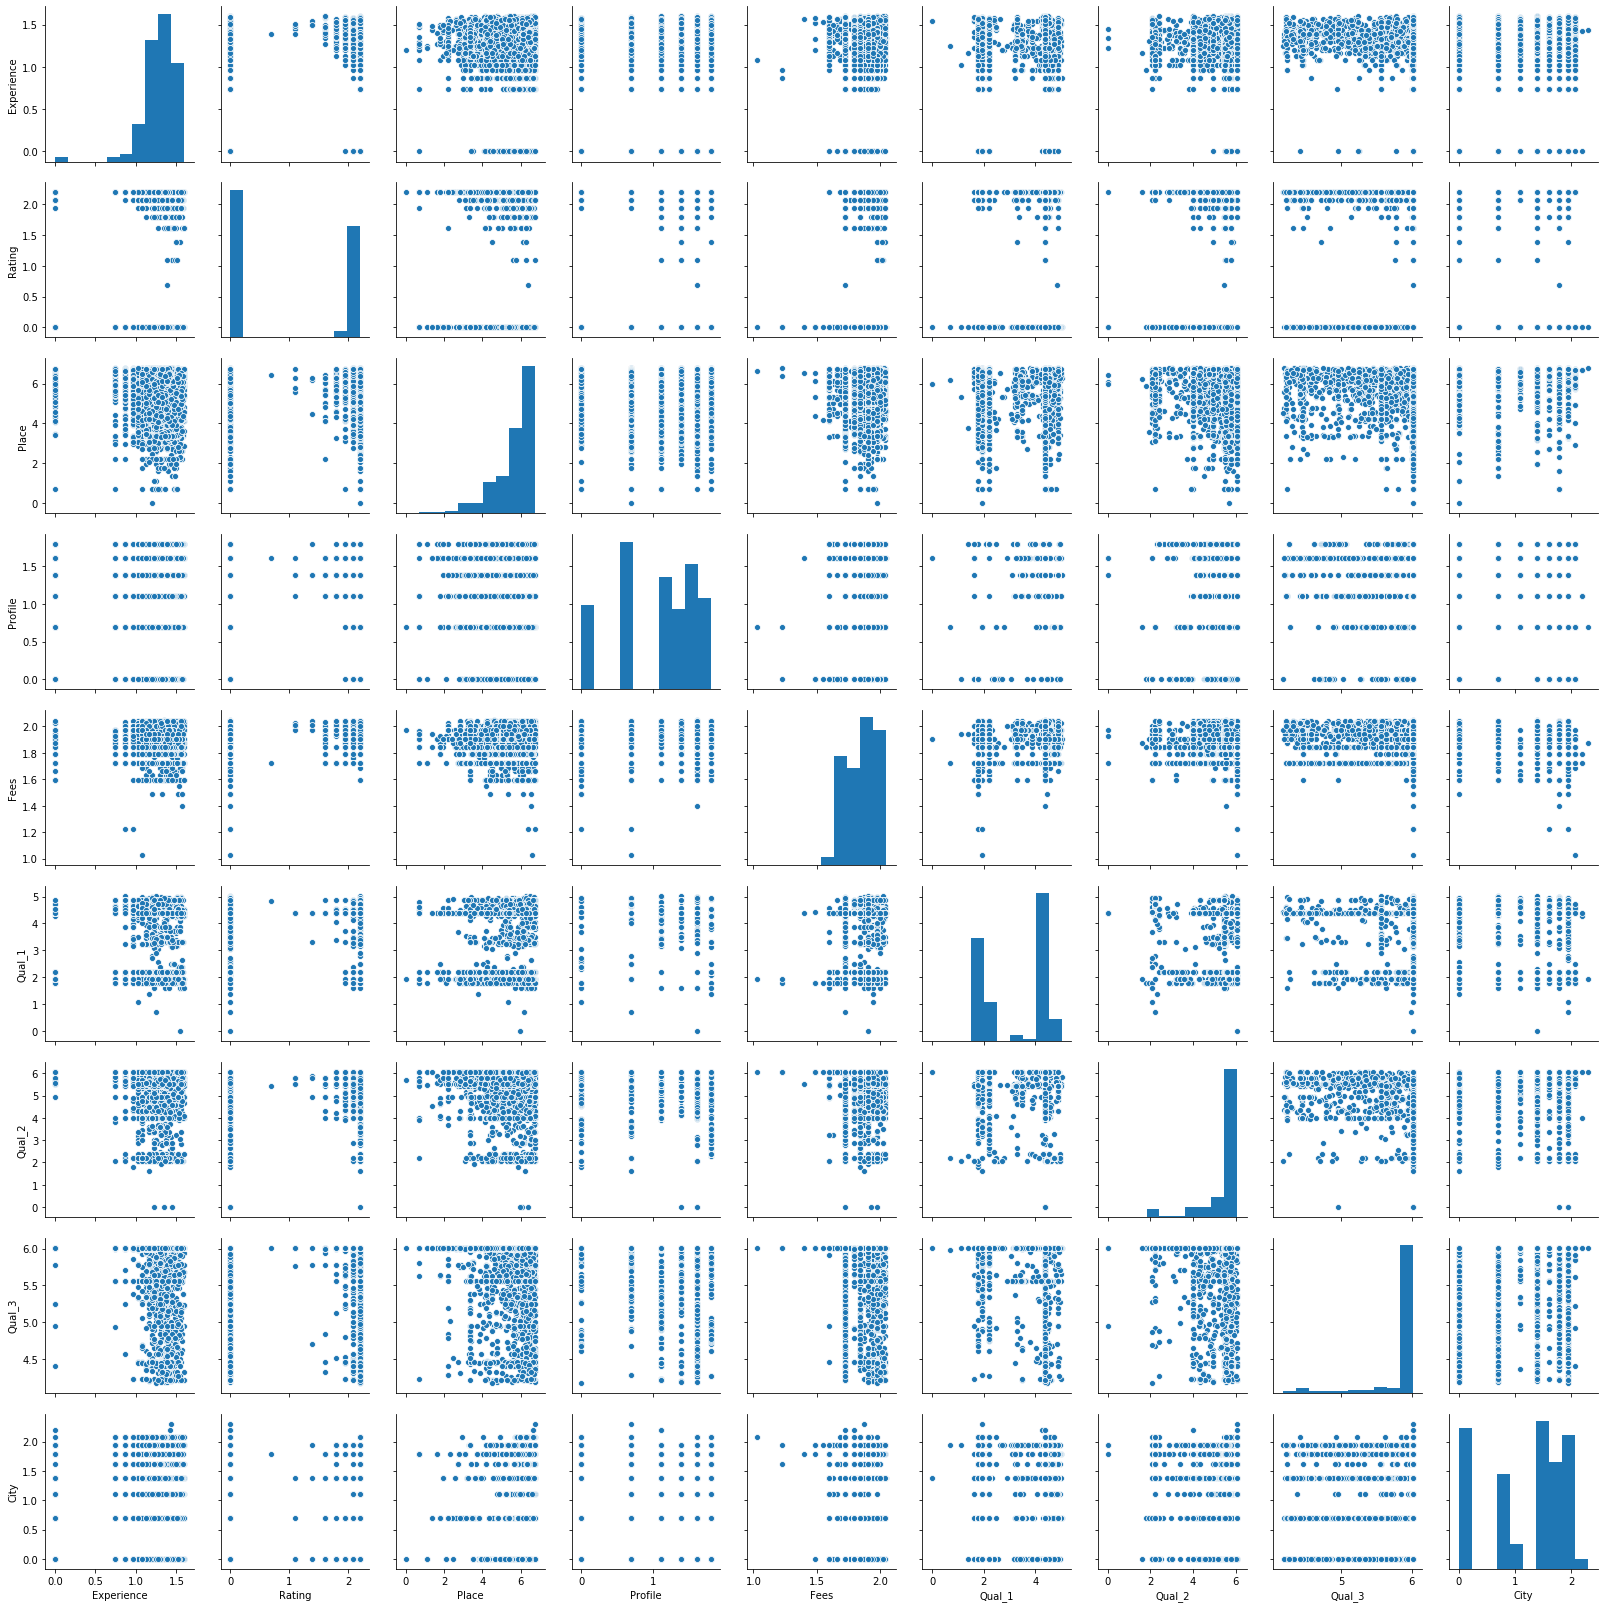

In [174]:
sns.pairplot(train)

Plotting Outliers

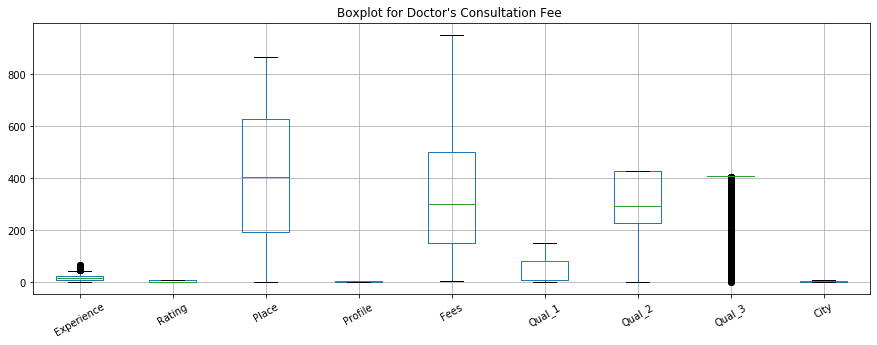

In [122]:
train.plot(kind='box',grid=True,title="Boxplot for Train_Doctor's Consultation Fee ",legend=True,rot=30,figsize=(15,5))

In [123]:
#check for Outlier
from scipy.stats import zscore
z_score=abs(zscore(train))
print(train.shape)
train=train.loc[(z_score < 3).all(axis=1)]
print(train.shape)

(5921, 9)
(5737, 9)


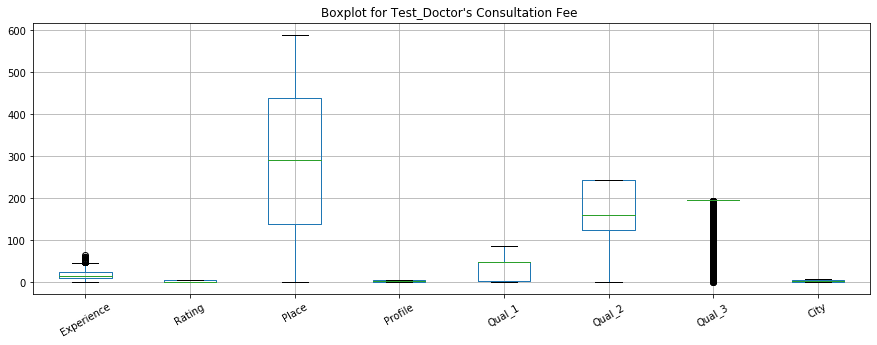

In [124]:
test.plot(kind='box',grid=True,title="Boxplot for Test_Doctor's Consultation Fee ",legend=True,rot=30,figsize=(15,5))

In [125]:
#check for Outlier
from scipy.stats import zscore
z_score=abs(zscore(test))
print(test.shape)
test=test.loc[(z_score < 3).all(axis=1)]
print(test.shape)

(1976, 8)
(1924, 8)


In [126]:
#Check Skewness
train.skew()

Experience    0.899367
Rating        0.253042
Place         0.117075
Profile       0.100445
Fees          0.700750
Qual_1        0.063027
Qual_2       -0.619416
Qual_3       -2.395857
City         -0.001566
dtype: float64

In [127]:
for col in train.columns:
    if train.skew().loc[col] > 0.55:
        train[col]=np.log1p(train[col])
    if train.skew().loc[col]<=0.55:
        train[col]=np.log1p(train[col])

In [128]:
train.skew()

Experience   -2.459557
Rating        0.228058
Place        -1.510914
Profile      -0.589514
Fees         -0.585379
Qual_1       -0.191495
Qual_2       -2.343843
Qual_3       -2.886212
City         -0.551303
dtype: float64

In [129]:
#Check Skewness
test.skew()

Experience    0.865397
Rating        0.285001
Place         0.039501
Profile       0.017859
Qual_1        0.011874
Qual_2       -0.462941
Qual_3       -2.323650
City         -0.001676
dtype: float64

In [130]:
for col in test.columns:
    if test.skew().loc[col] > 0.55:
        test[col]=np.log1p(test[col])
    if test.skew().loc[col]<=0.55:
        test[col]=np.log1p(test[col])

In [131]:
test.skew()

Experience   -2.729105
Rating        0.243483
Place        -1.741168
Profile      -0.657451
Qual_1       -0.302809
Qual_2       -2.061068
Qual_3       -2.842580
City         -0.554638
dtype: float64

Exploring Data Variables

In [132]:
train.describe()

,Experience,Rating,Place,Profile,Fees,Qual_1,Qual_2,Qual_3,City
count,5737.000000,5737.000000,5737.000000,5737.000000,5737.000000,5737.000000,5737.000000,5737.000000,5737.000000
mean,1.290423,0.964331,5.676882,1.094682,1.870137,3.312759,5.444234,5.861997,1.175392
std,0.216328,1.077334,1.029137,0.571960,0.106781,1.218891,0.892115,0.390717,0.732670
min,0.000000,0.000000,0.000000,0.000000,1.026672,0.000000,0.000000,4.174387,0.000000
25%,1.194706,0.000000,5.262690,0.693147,1.794635,1.945910,5.455321,6.008813,0.693147
50%,1.310506,0.000000,6.006353,1.098612,1.903168,4.382027,5.690359,6.008813,1.386294
75%,1.429846,2.197225,6.432940,1.609438,1.976385,4.382027,6.056784,6.008813,1.791759
max,1.595709,2.197225,6.765039,1.791759,2.047230,5.017280,6.056784,6.008813,2.302585


In [133]:
train.corr()

,Experience,Rating,Place,Profile,Fees,Qual_1,Qual_2,Qual_3,City
Experience,1.000000,0.084620,-0.002693,0.128258,0.026686,0.157669,-0.047843,-0.077675,0.021945
Rating,0.084620,1.000000,-0.035550,-0.043987,0.175530,0.014390,-0.103675,-0.103113,-0.114358
Place,-0.002693,-0.035550,1.000000,0.012972,-0.044027,-0.013736,0.024063,0.013578,-0.027048
Profile,0.128258,-0.043987,0.012972,1.000000,0.176483,0.497386,0.018611,-0.117265,-0.011238
Fees,0.026686,0.175530,-0.044027,0.176483,1.000000,0.234708,-0.097983,-0.099721,-0.106774
Qual_1,0.157669,0.014390,-0.013736,0.497386,0.234708,1.000000,-0.353175,-0.241874,-0.023562
Qual_2,-0.047843,-0.103675,0.024063,0.018611,-0.097983,-0.353175,1.000000,0.100992,0.017268
Qual_3,-0.077675,-0.103113,0.013578,-0.117265,-0.099721,-0.241874,0.100992,1.000000,0.032112
City,0.021945,-0.114358,-0.027048,-0.011238,-0.106774,-0.023562,0.017268,0.032112,1.000000


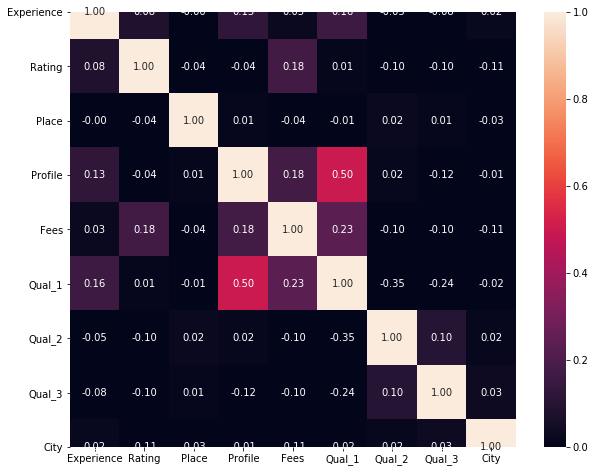

In [134]:
#showing the corelation with a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(),annot=True,fmt='.2f',vmax=1,vmin=0)
plt.show()

Features and Target Value

In [135]:
x=train.drop("Fees",axis=1)
y=train["Fees"]

In [136]:
x.head(2)

,Experience,Rating,Place,Profile,Qual_1,Qual_2,Qual_3,City
0,1.439569,2.197225,5.693732,1.791759,2.197225,5.533389,6.008813,1.609438
1,1.271150,2.197225,6.753438,0.000000,1.791759,5.488938,6.008813,0.000000


In [137]:
y.head(2)

0    1.725463
1    1.925822
Name: Fees, dtype: float64

In [138]:
y=np.array(y)
y=y.reshape(-1,1)
y.shape

(5737, 1)

Standardisation

In [139]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(x)
x

array([[ 0.68950004,  1.14449219,  0.0163742 , ...,  0.09994646,
         0.37579376,  0.59246787],
       [-0.08910192,  1.14449219,  1.04616695, ...,  0.05011472,
         0.37579376, -1.6043991 ],
       [-0.44250476, -0.89518693,  0.42661759, ...,  0.41466547,
         0.37579376, -1.6043991 ],
       ...,
       [ 1.22566131,  1.14449219, -0.29309032, ...,  0.68668719,
         0.37579376,  0.28787911],
       [ 0.17261396,  1.03515444,  1.02900749, ...,  0.08657418,
         0.37579376,  1.05174917],
       [ 0.31474049,  1.14449219,  0.69647744, ...,  0.26449468,
         0.37579376,  0.28787911]])

Spilt Train and Test

In [162]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [163]:
def mod(model,x,y):
    max_r=0
    for i in range(30,150):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        r2score=r2_score(y_test,pred)
        MAE= mean_absolute_error(y_test,pred)
        MSE= mean_squared_error(y_test,pred)
        RMSE=np.sqrt(MSE)
        if r2score > max_r:
            max_r=r2score
            random_state=i
    print('the random state at ', mod,'\nis: ',random_state, 
          '\nand it produces \n r2 score of ',r2score,
          '\n mean abs error value of ', MAE,
          '\n mean squared error value of',MSE,
          '\n & root mean sq error ', RMSE)
    print()
    print('prediction: ',pred)
    return random_state

LinearRegression

In [142]:
lr=LinearRegression()
mod(lr,x,y)

the random state at  <function mod at 0x000000AB7780C948> 
is:  148 
and it produces 
 r2 score of  0.11492538088283999 
 mean abs error value of  0.08241154418742261 
 mean squared error value of 0.010452528651708358 
 & root mean sq error  0.10223760879298947

prediction:  [[1.88094735]
 [1.88517805]
 [1.86550245]
 ...
 [1.82827426]
 [1.80015266]
 [1.82435009]]


148

In [143]:
#cross validation
lr_scr=cross_val_score(lr,x,y,cv=10,scoring='r2')
print('the r2 score at liner regression model is=', lr_scr.mean())

the r2 score at liner regression model is= 0.09701912852812224


Decision Tree Regressor

In [144]:
dtr=DecisionTreeRegressor()
dtr_para={'criterion':['mse','friedman_mse','mae'],'max_depth':[6,8,9]}
dtr_grid=GridSearchCV(dtr,dtr_para,cv=10)
dtr_grid.fit(x,y)
dtr_grid.best_params_

{'criterion': 'friedman_mse', 'max_depth': 6}

In [145]:
dtr=DecisionTreeRegressor(criterion='friedman_mse',max_depth=6)
mod(dtr,x,y)

the random state at  <function mod at 0x000000AB7780C948> 
is:  91 
and it produces 
 r2 score of  0.16178265688326787 
 mean abs error value of  0.07811733466932098 
 mean squared error value of 0.009899154948117108 
 & root mean sq error  0.09949449707454733

prediction:  [1.89311106 1.89311106 1.89311106 ... 1.80110686 1.81178508 1.78129313]


91

In [146]:
#Cross Validation
dtr_scr=cross_val_score(dtr,x,y,cv=10,scoring='r2')
print('the r2 score at DTR model is=', dtr_scr.mean())

the r2 score at DTR model is= 0.16391685764531133


KNN

In [159]:
knr=KNeighborsRegressor()
k_para={'n_neighbors': range(4,20),'algorithm':['ball_tree', 'kd_tree', 'brute','auto']}
k_grid=GridSearchCV(knr,k_para,cv=20)
k_grid.fit(x,y)
k_grid.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 17}

In [160]:
knr=KNeighborsRegressor(algorithm='ball_tree',n_neighbors=17)
mod(knr,x,y)

the random state at  <function mod at 0x000000AB7780C948> 
is:  40 
and it produces 
 r2 score of  0.15049947280803866 
 mean abs error value of  0.07889640742469735 
 mean squared error value of 0.010032406769242058 
 & root mean sq error  0.10016190278365351

prediction:  [[1.86245939]
 [1.93109113]
 [1.7591763 ]
 ...
 [1.81349204]
 [1.7513621 ]
 [1.77117401]]


40

In [161]:
#Cross Validation
knr_scr=cross_val_score(knr,x,y,cv=20,scoring='r2')
print('the r2 score at KNR model is=', knr_scr.mean())

the r2 score at KNR model is= 0.14671608718071077


Random Forest Regressor

In [164]:
rf=RandomForestRegressor()
rf_para={'criterion':['mse','mae'],'max_depth':[6,8,9],'n_estimators' : [100]}
rf_grid=GridSearchCV(rf,rf_para,cv=10)
rf_grid.fit(x,y)
rf_grid.best_params_

{'criterion': 'mse', 'max_depth': 9, 'n_estimators': 100}

In [169]:
rf=RandomForestRegressor(criterion='mse',max_depth=9,n_estimators=100)
mod(rf,x,y)

the random state at  <function mod at 0x000000AB77853F78> 
is:  63 
and it produces 
 r2 score of  0.22021418877530674 
 mean abs error value of  0.07532410399356756 
 mean squared error value of 0.009209091931877909 
 & root mean sq error  0.09596401373367992

prediction:  [1.88554727 1.90234515 1.89881944 ... 1.8075851  1.8019747  1.80452003]


63

In [170]:
#Cross Validation
rf_scr=cross_val_score(rf,x,y,cv=10,scoring='r2')
print('the r2 score at Random Forest Regressor model is=', rf_scr.mean())

the r2 score at Random Forest Regressor model is= 0.21084680513931095


AdaBoost Regressor

In [152]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

ada_param= {"learning_rate": [0.0001,0.025,0.1,1.0],"n_estimators":[250,500,750,1000]}

ada_g= GridSearchCV(ada,ada_param,cv=10)
ada_g.fit(x_train,y_train)
print("best parameters:", ada_g.best_params_)
print("\n best score:",ada_g.best_score_)

best parameters: {'learning_rate': 0.0001, 'n_estimators': 1000}

 best score: 0.1419288367133143


In [153]:
ada=AdaBoostRegressor(learning_rate=0.0001, n_estimators=1000)
mod(ada,x,y)

the random state at  <function mod at 0x000000AB7780C948> 
is:  63 
and it produces 
 r2 score of  0.14212831700914552 
 mean abs error value of  0.08045633728439165 
 mean squared error value of 0.010131268203008087 
 & root mean sq error  0.10065420111951655

prediction:  [1.90971122 1.90973018 1.90917533 ... 1.79687189 1.79646882 1.85326976]


63

In [154]:
#Cross Validation
ada_scr=cross_val_score(ada,x,y,cv=10,scoring='r2')
print('the r2 score at AdaBoost Reg model is=', ada_scr.mean())

the r2 score at AdaBoost Reg model is= 0.1394512073875765


In [171]:
import joblib
joblib.dump(rf,"RF_DocFee.pkl")

['RF_DocFee.pkl']

In [173]:
# Load the model from the file 
model=joblib.load('RF_DocFee.pkl')  
  
# Use the loaded model to make predictions 
model.predict(test)

array([1.8371933 , 1.8371933 , 1.83530464, ..., 1.84575737, 1.82835034,
       1.84299509])